In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from funpymodeling.exploratory import freq_tbl


In [2]:
df=pd.read_csv("Dstos_limpios_de_bangkook.csv")
df.head(5)

,Unnamed: 0.1,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,host_since,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0,https://www.airbnb.com/rooms/27934,2024-09-25,city scrape,Nice room with superb city view,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,https://www.airbnb.com/users/show/120437,Nuttee,2010-05-08,...,1.0,15.0,240.0,362,5.9,4.86,4.82,4.91,4.66,0.43
1,1,https://www.airbnb.com/rooms/27979,2024-09-25,previous scrape,"Easy going landlord,easy place",The neighborhood is very nice,https://a0.muscache.com/pictures/106247594/1d6...,https://www.airbnb.com/users/show/120541,Emy,2010-05-08,...,1.0,1.0,730.0,0,0.0,4.80,4.80,4.90,4.80,1.00
2,2,https://www.airbnb.com/rooms/28745,2024-09-25,previous scrape,modern-style apartment in Bangkok,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,https://www.airbnb.com/users/show/123784,Familyroom,2010-05-12,...,1.0,3.0,730.0,0,0.0,4.80,4.80,4.90,4.80,1.00
3,3,https://www.airbnb.com/rooms/35780,2024-09-25,city scrape,Spacious one bedroom at The Kris Condo Bldg. 3,"There is McDonald's, Au bon Pain and Max Value...",https://a0.muscache.com/pictures/89302e4b-b529...,https://www.airbnb.com/users/show/153730,Sirilak,2010-06-27,...,1.0,14.0,180.0,344,6.0,4.83,4.67,4.83,4.83,0.06
4,4,https://www.airbnb.com/rooms/48736,2024-09-25,city scrape,Condo with Chaopraya River View,The neighborhood is very nice,https://a0.muscache.com/pictures/12465296/e9c0...,https://www.airbnb.com/users/show/222005,Athitaya,2010-09-03,...,1.0,3.0,1095.0,365,1.0,5.00,5.00,5.00,5.00,0.01


In [151]:
#Nuevo dataframe para la varible room type
df_2 = df[['room_type', 'price']].copy()
df_2

,room_type,price
0,Entire home/apt,"$3,865.00"
1,Entire home/apt,$100
2,Entire home/apt,"$2,029.00"
3,Entire home/apt,"$1,140.00"
4,Entire home/apt,"$3,633.00"
...,...,...
26577,Private room,$488.00
26578,Private room,"$2,800.00"
26579,Private room,"$2,700.00"
26580,Private room,"$2,600.00"


In [152]:
# Eliminamos el símbolo "$" y convertimos a números usando una función lambda ela columna de price
df_2['price'] = df_2['price'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
df_2.head(5)

,room_type,price
0,Entire home/apt,NaN
1,Entire home/apt,100.0
2,Entire home/apt,NaN
3,Entire home/apt,NaN
4,Entire home/apt,NaN


In [153]:
#Reemplazar valores nulos
df_2['price'].fillna(df_2['price'].mean(), inplace=True)
df_2

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\435592605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['price'].fillna(df_2['price'].mean(), inplace=True)


,room_type,price
0,Entire home/apt,513.049381
1,Entire home/apt,100.000000
2,Entire home/apt,513.049381
3,Entire home/apt,513.049381
4,Entire home/apt,513.049381
...,...,...
26577,Private room,488.000000
26578,Private room,513.049381
26579,Private room,513.049381
26580,Private room,513.049381


In [154]:
#Convertir a numeros enteros
df_2['price'] = df_2['price'].astype(int)
df_2


,room_type,price
0,Entire home/apt,513
1,Entire home/apt,100
2,Entire home/apt,513
3,Entire home/apt,513
4,Entire home/apt,513
...,...,...
26577,Private room,488
26578,Private room,513
26579,Private room,513
26580,Private room,513


In [155]:
#Obtengo un ánalisis univariado de la varible room_type
table1 = freq_tbl(df_2['room_type'])
table1

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,17363,0.653186,0.653186
1,Private room,8693,0.327026,0.980212
2,Shared room,401,0.015085,0.995298
3,Hotel room,125,0.004702,1.000000


In [156]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table1_2 = table1.drop(['percentage', 'cumulative_perc', 'frequency'], axis=1)
table1_2

,room_type
0,Entire home/apt
1,Private room
2,Shared room
3,Hotel room


In [157]:
#Ajusto el índice de mi dataframe
Filtro_index1 = table1_2.set_index('room_type')
Filtro_index1

""
room_type
Entire home/apt
Private room
Shared room
Hotel room


In [158]:
#Creamos un dataframe para cada valor de room type
entire_home_apt = df_2[df_2['room_type'] == 'Entire home/apt'].copy()
private_room = df_2[df_2['room_type'] == 'Private room'].copy()
shared_room = df_2[df_2['room_type'] == 'Shared room'].copy()
hotel_room = df_2[df_2['room_type'] == 'Hotel room'].copy()

In [159]:
#Visualizamos cada data frame para aseguarnoes de que sea correcto
entire_home_apt

,room_type,price
0,Entire home/apt,513
1,Entire home/apt,100
2,Entire home/apt,513
3,Entire home/apt,513
4,Entire home/apt,513
...,...,...
26572,Entire home/apt,700
26573,Entire home/apt,513
26574,Entire home/apt,513
26575,Entire home/apt,513


In [160]:
private_room

,room_type,price
5,Private room,100
7,Private room,335
10,Private room,384
11,Private room,947
12,Private room,513
...,...,...
26576,Private room,262
26577,Private room,488
26578,Private room,513
26579,Private room,513


In [161]:
shared_room

,room_type,price
115,Shared room,100
258,Shared room,640
366,Shared room,290
444,Shared room,513
456,Shared room,550
...,...,...
26261,Shared room,513
26336,Shared room,70
26371,Shared room,70
26447,Shared room,513


In [163]:
hotel_room

,room_type,price
48,Hotel room,100
62,Hotel room,100
75,Hotel room,100
100,Hotel room,513
135,Hotel room,513
...,...,...
24907,Hotel room,513
24908,Hotel room,513
24909,Hotel room,513
24910,Hotel room,513


Ahora creamos las categoari/intervalos para la variable de price


In [17]:
#Nuevo un nuevo dataframe para price 
df_3 = df_2[['price']].copy()
df_3

,price
0,513
1,100
2,513
3,513
4,513
...,...
26577,488
26578,513
26579,513
26580,513


In [18]:
#Calculamos el numero totak de la poblacion "n"
df_3['price'].info()
n= 25080

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: price
Non-Null Count  Dtype
--------------  -----
26582 non-null  int32
dtypes: int32(1)
memory usage: 104.0 KB


In [20]:
#calcular maximo y minimo
df_3= df_3.dropna(subset=['price'])
df_3['price'] = df_3['price'].replace({'\$': '', ',': ''}, regex=True)
df_3['price'] = pd.to_numeric(df_3['price'], errors='coerce')
Max = df_3['price'].max()
Min = df_3['price'].min()
Limites = [Max, Min]
Limites

[999, 0]

In [21]:
#Rango
R=Max-Min
R

999

In [22]:
#Calculamos la regla  de sturges
ni=1+3.32*np.log10(n)
ni

15.605767406766812

In [23]:
#Categorización de variables
intervalos=np.linspace(Min, Max, 7)
intervalos

array([  0. , 166.5, 333. , 499.5, 666. , 832.5, 999. ])

In [24]:
#Creamos categorias
categorias=["0-166.4", "166.5-332", "333-499.4", "499.5-665", "666-832.4", "832.5-999" ]

In [25]:
intervalos = sorted(intervalos)
print("Intervalos:", intervalos)
df_3['price']=pd.cut(x=df_3['price'], bins=intervalos, labels=categorias)
df_3['price']

Intervalos: [0.0, 166.5, 333.0, 499.5, 666.0, 832.5, 999.0]


0        499.5-665
1          0-166.4
2        499.5-665
3        499.5-665
4        499.5-665
           ...    
26577    333-499.4
26578    499.5-665
26579    499.5-665
26580    499.5-665
26581    499.5-665
Name: price, Length: 26582, dtype: category
Categories (6, object): ['0-166.4' < '166.5-332' < '333-499.4' < '499.5-665' < '666-832.4' < '832.5-999']

In [27]:
#Obtengo un ánalisis univariado de una variable en específico
table2 = freq_tbl(df_3['price'])
table2

,price,frequency,percentage,cumulative_perc
0,499.5-665,14539,0.546949,0.546970
1,0-166.4,2964,0.111504,0.658478
2,832.5-999,2634,0.099090,0.757571
3,333-499.4,2542,0.095629,0.853203
4,666-832.4,2471,0.092958,0.946165
5,166.5-332,1431,0.053833,1.000000


In [28]:
#Eliminar las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2_2= table2.drop(['percentage','cumulative_perc'], axis=1)
table2_2

,price,frequency
0,499.5-665,14539
1,0-166.4,2964
2,832.5-999,2634
3,333-499.4,2542
4,666-832.4,2471
5,166.5-332,1431


In [29]:
#Obtengo un filtro de los valores más relevantes de lass variables categoricas seleccionadas
filtro2= table2_2[table2_2['frequency']>0]
filtro2

,price,frequency
0,499.5-665,14539
1,0-166.4,2964
2,832.5-999,2634
3,333-499.4,2542
4,666-832.4,2471
5,166.5-332,1431


In [31]:
#Convertir categorica a indice
Filtro_index1=filtro2.set_index('price')
Filtro_index1

,frequency
price,
499.5-665,14539
0-166.4,2964
832.5-999,2634
333-499.4,2542
666-832.4,2471
166.5-332,1431


In [32]:
categorias = ["0-166.4", "166.5-332", "333-499.4", "499.5-665", "666-832.4", "832.5-999"]
print(len(categorias))  # Debería ser 6 si intervalos tiene 7 valores

6


In [33]:
df_encoded = pd.get_dummies(df_3, columns=['price'], drop_first=True)
df_encoded

,price_166.5-332,price_333-499.4,price_499.5-665,price_666-832.4,price_832.5-999
0,False,False,True,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
26577,False,True,False,False,False
26578,False,False,True,False,False
26579,False,False,True,False,False
26580,False,False,True,False,False


In [34]:
# Crear un DataFrame para cada columna creada
categorias_unicas = df_3['price'].unique()
print(categorias_unicas)

['499.5-665', '0-166.4', '333-499.4', '832.5-999', '666-832.4', '166.5-332', NaN]
Categories (6, object): ['0-166.4' < '166.5-332' < '333-499.4' < '499.5-665' < '666-832.4' < '832.5-999']


In [35]:
# Crear un diccionario para almacenar los DataFrames de cada categoría
dataframes_por_categoria = {}

# Iterar sobre cada categoría única
for categoria in categorias_unicas:
    # Filtrar el DataFrame para la categoría actual
    dataframes_por_categoria[categoria] = df_3[df_3['price'] == categoria]

In [36]:
# Acceder al DataFrame para la categoría '0-166.4'
df_0_166_4 = dataframes_por_categoria['0-166.4']
df_0_166_4



,price
1,0-166.4
5,0-166.4
8,0-166.4
18,0-166.4
19,0-166.4
...,...
26082,0-166.4
26336,0-166.4
26371,0-166.4
26466,0-166.4


In [37]:
df_166_5_332=dataframes_por_categoria['166.5-332']
df_166_5_332

,price
69,166.5-332
99,166.5-332
181,166.5-332
295,166.5-332
305,166.5-332
...,...
26532,166.5-332
26541,166.5-332
26545,166.5-332
26560,166.5-332


In [38]:
df_333_499_4=dataframes_por_categoria['333-499.4']
df_333_499_4

,price
7,333-499.4
10,333-499.4
16,333-499.4
30,333-499.4
35,333-499.4
...,...
26567,333-499.4
26568,333-499.4
26569,333-499.4
26570,333-499.4


In [39]:
df_499_5_665=dataframes_por_categoria['499.5-665']
df_499_5_665

,price
0,499.5-665
2,499.5-665
3,499.5-665
4,499.5-665
6,499.5-665
...,...
26575,499.5-665
26578,499.5-665
26579,499.5-665
26580,499.5-665


room type vs price

In [40]:
df_666_832_4=dataframes_por_categoria['666-832.4']
df_666_832_4

,price
15,666-832.4
21,666-832.4
31,666-832.4
34,666-832.4
37,666-832.4
...,...
26475,666-832.4
26488,666-832.4
26538,666-832.4
26540,666-832.4


In [41]:
df_832_5_999=dataframes_por_categoria['832.5-999']
df_832_5_999

,price
11,832.5-999
22,832.5-999
32,832.5-999
33,832.5-999
47,832.5-999
...,...
26517,832.5-999
26520,832.5-999
26528,832.5-999
26544,832.5-999


In [42]:
# Asignar un valor numérico al intervalo 83-234
df_0_166_4['price_numerico'] = 200

# Asignar un valor numérico al intervalo 0-100 (si tienes un DataFrame para este intervalo)
df_166_5_332['price_numerico'] = 311

# Asignar un valor numérico al intervalo 846-1000
df_333_499_4['price_numerico'] = 464

# Asignar un valor numérico al intervalo 0-100 (si tienes un DataFrame para este intervalo)
df_499_5_665['price_numerico'] = 617

# Asignar un valor numérico al intervalo 846-1000
df_666_832_4['price_numerico'] = 769

# Asignar un valor numérico al intervalo 0-100 (si tienes un DataFrame para este intervalo)
df_832_5_999['price_numerico'] = 923

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\1354190721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_166_4['price_numerico'] = 200
C:\Users\elias\AppData\Local\Temp\ipykernel_18440\1354190721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_166_5_332['price_numerico'] = 311
C:\Users\elias\AppData\Local\Temp\ipykernel_18440\1354190721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [43]:
df_0_166_4

,price,price_numerico
1,0-166.4,200
5,0-166.4,200
8,0-166.4,200
18,0-166.4,200
19,0-166.4,200
...,...,...
26082,0-166.4,200
26336,0-166.4,200
26371,0-166.4,200
26466,0-166.4,200


In [44]:
entire_home_apt

,room_type,price
0,Entire home/apt,513
1,Entire home/apt,100
2,Entire home/apt,513
3,Entire home/apt,513
4,Entire home/apt,513
...,...,...
26572,Entire home/apt,700
26573,Entire home/apt,513
26574,Entire home/apt,513
26575,Entire home/apt,513


In [45]:
# Definir los intervalos y sus límites
intervalos = {
    '0-166.4': (0, 166.4),
    '166.5-332': (166.5, 332),
    '333-499.4': (333, 499.4),
    '499.5-665': (499.5, 665),
    '666-832.4': (666, 832.4),
    '832.5-999': (832.5, 999)
}

In [46]:
# Función para asignar intervalos
def asignar_intervalo(precio):
    for intervalo, (limite_inferior, limite_superior) in intervalos.items():
        if limite_inferior <= precio <= limite_superior:
            return intervalo
    return None  # Si el precio no cae en ningún intervalo

# Aplicar la función a la columna price en entire_home_apt
entire_home_apt['price_interval'] = entire_home_apt['price'].apply(asignar_intervalo)

In [47]:
print(entire_home_apt[['price', 'price_interval']].head(6))

   price price_interval
0    513      499.5-665
1    100        0-166.4
2    513      499.5-665
3    513      499.5-665
4    513      499.5-665
6    513      499.5-665


In [48]:


# combinamos los dataframes de precio en uno solo
df_0_166_4 = pd.DataFrame({'price': ['0-166.4'], 'price_numeric': [150]})
df_166_5_332 = pd.DataFrame({'price': ['166.5-332'], 'price_numeric': [300]})
df_333_499_4 = pd.DataFrame({'price': ['333-499.4'], 'price_numeric': [450]})
df_499_5_665 = pd.DataFrame({'price': ['499.5-665'], 'price_numeric': [600]})
df_666_832_4 = pd.DataFrame({'price': ['666-832.4'], 'price_numeric': [750]})
df_832_5_999 = pd.DataFrame({'price': ['832.5-999'], 'price_numeric': [900]})

# Concatenar todos los DataFrames de intervalos en uno solo
df_intervalos_completos = pd.concat([df_0_166_4, df_166_5_332, df_333_499_4, df_499_5_665, df_666_832_4, df_832_5_999], ignore_index=True)
df_intervalos_completos

,price,price_numeric
0,0-166.4,150
1,166.5-332,300
2,333-499.4,450
3,499.5-665,600
4,666-832.4,750
5,832.5-999,900


In [49]:
# Combinar entire_home_apt con df_intervalos_completos
df_combinado = entire_home_apt.merge(df_intervalos_completos, left_on='price_interval', right_on='price', how='left')
df_combinado

,room_type,price_x,price_interval,price_y,price_numeric
0,Entire home/apt,513,499.5-665,499.5-665,600
1,Entire home/apt,100,0-166.4,0-166.4,150
2,Entire home/apt,513,499.5-665,499.5-665,600
3,Entire home/apt,513,499.5-665,499.5-665,600
4,Entire home/apt,513,499.5-665,499.5-665,600
...,...,...,...,...,...
17358,Entire home/apt,700,666-832.4,666-832.4,750
17359,Entire home/apt,513,499.5-665,499.5-665,600
17360,Entire home/apt,513,499.5-665,499.5-665,600
17361,Entire home/apt,513,499.5-665,499.5-665,600


In [50]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17363 entries, 0 to 17362
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   room_type       17363 non-null  object
 1   price_x         17363 non-null  int32 
 2   price_interval  17363 non-null  object
 3   price_y         17363 non-null  object
 4   price_numeric   17363 non-null  int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 610.5+ KB


In [51]:
ordinal_mapping = {'Entire home/apt': 2}  # Define tu propio orden
df_combinado['room_type_ordinal'] = df_combinado['room_type'].map(ordinal_mapping)
df_combinado

,room_type,price_x,price_interval,price_y,price_numeric,room_type_ordinal
0,Entire home/apt,513,499.5-665,499.5-665,600,2
1,Entire home/apt,100,0-166.4,0-166.4,150,2
2,Entire home/apt,513,499.5-665,499.5-665,600,2
3,Entire home/apt,513,499.5-665,499.5-665,600,2
4,Entire home/apt,513,499.5-665,499.5-665,600,2
...,...,...,...,...,...,...
17358,Entire home/apt,700,666-832.4,666-832.4,750,2
17359,Entire home/apt,513,499.5-665,499.5-665,600,2
17360,Entire home/apt,513,499.5-665,499.5-665,600,2
17361,Entire home/apt,513,499.5-665,499.5-665,600,2


In [53]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17363 entries, 0 to 17362
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   room_type          17363 non-null  object
 1   price_x            17363 non-null  int32 
 2   price_interval     17363 non-null  object
 3   price_y            17363 non-null  object
 4   price_numeric      17363 non-null  int64 
 5   room_type_ordinal  17363 non-null  int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 746.2+ KB


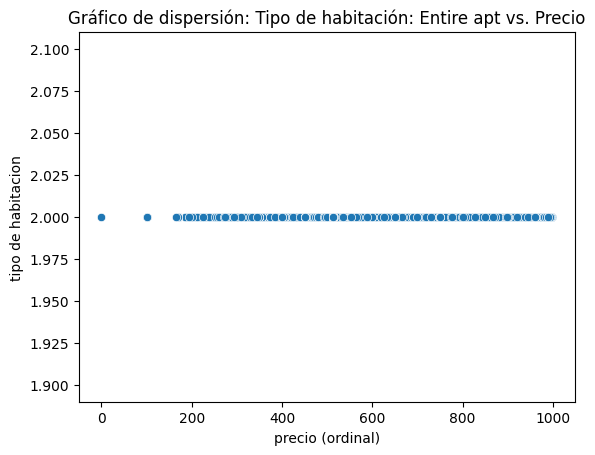

In [54]:


sns.scatterplot(x='price_x', y='room_type_ordinal', data=df_combinado)  # O price_numeric
plt.xlabel('precio (ordinal)')
plt.ylabel('tipo de habitacion')
plt.title('Gráfico de dispersión: Tipo de habitación: Entire apt vs. Precio')
plt.show()

price vs private room

In [164]:
private_room

,room_type,price
5,Private room,100
7,Private room,335
10,Private room,384
11,Private room,947
12,Private room,513
...,...,...
26576,Private room,262
26577,Private room,488
26578,Private room,513
26579,Private room,513


In [168]:
# Definir los intervalos y sus límites
intervalos = {
    '0-166.4': (0, 166.4),
    '166.5-332': (166.5, 332),
    '333-499.4': (333, 499.4),
    '499.5-665': (499.5, 665),
    '666-832.4': (666, 832.4),
    '832.5-999': (832.5, 999)
}

In [169]:
# Función para asignar intervalos
def asignar_intervalo(precio):
    for intervalo, (limite_inferior, limite_superior) in intervalos.items():
        if limite_inferior <= precio <= limite_superior:
            return intervalo
    return None  # Si el precio no cae en ningún intervalo

# Aplicar la función a la columna price en private room
private_room['price_interval'] = private_room['price'].apply(asignar_intervalo)

In [170]:
print(private_room[['price', 'price_interval']].head(6))

    price price_interval
5     100        0-166.4
7     335      333-499.4
10    384      333-499.4
11    947      832.5-999
12    513      499.5-665
13    526      499.5-665


In [171]:
# Combinar entire_home_apt con df_intervalos_completos
df_combinado2 = private_room.merge(df_intervalos_completos, left_on='price_interval', right_on='price', how='left')
df_combinado2

,room_type,price_x,price_interval,price_y,price_numeric
0,Private room,100,0-166.4,0-166.4,150
1,Private room,335,333-499.4,333-499.4,450
2,Private room,384,333-499.4,333-499.4,450
3,Private room,947,832.5-999,832.5-999,900
4,Private room,513,499.5-665,499.5-665,600
...,...,...,...,...,...
8688,Private room,262,166.5-332,166.5-332,300
8689,Private room,488,333-499.4,333-499.4,450
8690,Private room,513,499.5-665,499.5-665,600
8691,Private room,513,499.5-665,499.5-665,600


In [173]:
ordinal_mapping = {'private_room': 2}  # Define tu propio orden
df_combinado2['room_type_ordinal'] = df_combinado2['room_type'].map(ordinal_mapping)
df_combinado2

,room_type,price_x,price_interval,price_y,price_numeric,room_type_ordinal
0,Private room,100,0-166.4,0-166.4,150,NaN
1,Private room,335,333-499.4,333-499.4,450,NaN
2,Private room,384,333-499.4,333-499.4,450,NaN
3,Private room,947,832.5-999,832.5-999,900,NaN
4,Private room,513,499.5-665,499.5-665,600,NaN
...,...,...,...,...,...,...
8688,Private room,262,166.5-332,166.5-332,300,NaN
8689,Private room,488,333-499.4,333-499.4,450,NaN
8690,Private room,513,499.5-665,499.5-665,600,NaN
8691,Private room,513,499.5-665,499.5-665,600,NaN


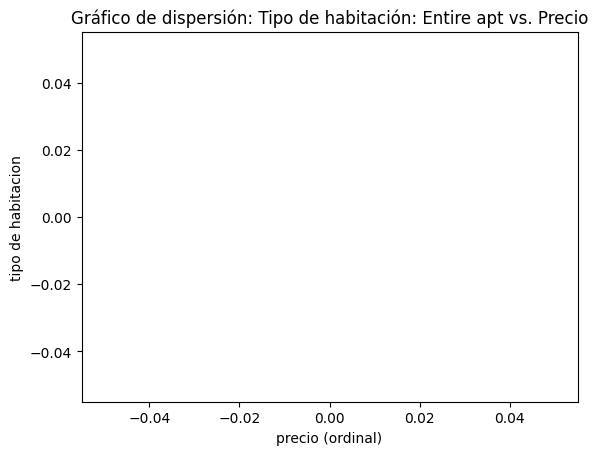

In [174]:
sns.scatterplot(x='price_x', y='room_type_ordinal', data=df_combinado2)  # O price_numeric
plt.xlabel('precio (ordinal)')
plt.ylabel('tipo de habitacion')
plt.title('Gráfico de dispersión: Tipo de habitación: Entire apt vs. Precio')
plt.show()

price vs shared room

price vs hotel room 

price vs host_acceptance_rate

In [55]:
#Conveetimos la columna de host_acceptance_rate a decimales
# Función para convertir porcentajes a decimales
def convertir_a_decimal(valor):
    if isinstance(valor, str) and valor.endswith('%'):  # Verifica si es un porcentaje
        return float(valor.strip('%')) / 100  # Elimina el % y divide entre 100
    return float(valor)  # Si no es un porcentaje, convierte a float directamente

# Aplicar la función a la columna
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(convertir_a_decimal)

print("\nDataFrame transformado:")
print(df)


DataFrame transformado:
       Unnamed: 0                                       listing_url  \
0               0                https://www.airbnb.com/rooms/35797   
1               1                https://www.airbnb.com/rooms/44616   
2               2                https://www.airbnb.com/rooms/67703   
3               3                https://www.airbnb.com/rooms/70644   
4               4               https://www.airbnb.com/rooms/107078   
...           ...                                               ...   
26577       26577  https://www.airbnb.com/rooms/1252141718111439700   
26578       26578  https://www.airbnb.com/rooms/1252159821531694005   
26579       26579  https://www.airbnb.com/rooms/1252185591721328995   
26580       26580  https://www.airbnb.com/rooms/1252218347521498445   
26581       26581  https://www.airbnb.com/rooms/1252229157495978163   

      last_scraped           source  \
0       2024-09-25      city scrape   
1       2024-09-26  previous scrape   
2    

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   listing_url                  26582 non-null  object 
 2   last_scraped                 26582 non-null  object 
 3   source                       26582 non-null  object 
 4   name                         26582 non-null  object 
 5   neighborhood_overview        26582 non-null  object 
 6   picture_url                  26582 non-null  object 
 7   host_url                     26582 non-null  object 
 8   host_name                    26582 non-null  object 
 9   host_since                   26582 non-null  object 
 10  host_location                26582 non-null  object 
 11  host_about                   26582 non-null  object 
 12  host_response_time           26582 non-null  object 
 13  host_response_ra

In [57]:
# Eliminamos el símbolo "$" y convertimos a números usando una función lambda ela columna de price
df['price'] = df['price'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
df.head(5)

,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,host_since,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,1.0,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70
1,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,...,1.0,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41
2,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,...,2.0,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31
3,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,...,1.0,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83
4,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,2011-04-27,...,1.0,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11


In [58]:
#Reemplazar valores nulos
df['price'].fillna(df['price'].mean(), inplace=True)
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3370486266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,host_since,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,1.0,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70
1,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,...,1.0,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41
2,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,...,2.0,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31
3,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,...,1.0,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83
4,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,2011-04-27,...,1.0,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,HostPal,2016-04-16,...,2.0,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70
26578,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,2024-08-13,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70
26579,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,2024-08-13,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70
26580,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,2024-08-13,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

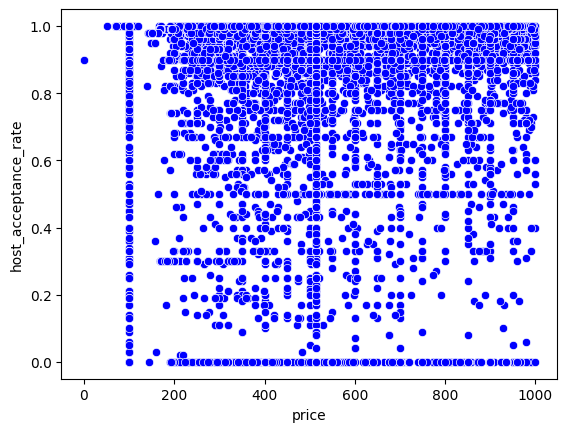

In [59]:
sns.scatterplot(x="price", y="host_acceptance_rate", color="blue", data=df)


In [60]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep= df[['price']]
Var_Dep= df['host_acceptance_rate']

In [61]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [62]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(Vars_Indep, Var_Dep)

LinearRegression()

In [63]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.41992446e-05]),
 'rank_': 1,
 'singular_': array([34866.12857706]),
 'intercept_': 0.8471270835110946}

In [64]:
#Predecimos los valores de total de accidentes a partir de la variable alcohol
#y_pred model.coef_
y_pred= model.predict(X=df[["price"]])
y_pred

array([0.89545595, 0.85654701, 0.89545595, ..., 0.89545595, 0.89545595,
       0.89545595])

In [65]:
df.insert(0, "Predicciones_1", y_pred)
df

,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,1.0,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70
1,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,1.0,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41
2,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,2.0,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31
3,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,1.0,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83
4,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,...,1.0,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,HostPal,...,2.0,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70
26578,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70
26579,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70
26580,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

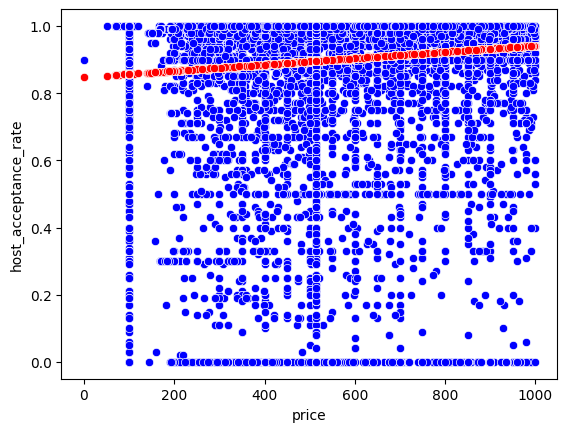

In [66]:
#Visualizamos la comparativa grafica entre el total real y el total predecido
sns.scatterplot(x="price", y="host_acceptance_rate", color="blue", data=df)
sns.scatterplot(x="price", y="Predicciones_1", color="red", data=df)

In [67]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.008205710507447339

In [68]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Corre1=np.sqrt(coef_Deter)
coef_Corre1

0.09058537689631445

price vs host_is_superhost

In [69]:
#Convertimos la columna de host:is_superhost a numerica usando un mapeo
df["host_is_superhost_numeros"] = df["host_is_superhost"].replace({'f': 0, 't': 1})
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3323019266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["host_is_superhost_numeros"] = df["host_is_superhost"].replace({'f': 0, 't': 1})


,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros
0,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0
1,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1
2,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1
3,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1
4,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,HostPal,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1
26578,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26579,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26580,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Predicciones_1               26582 non-null  float64
 1   Unnamed: 0                   26582 non-null  int64  
 2   listing_url                  26582 non-null  object 
 3   last_scraped                 26582 non-null  object 
 4   source                       26582 non-null  object 
 5   name                         26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   picture_url                  26582 non-null  object 
 8   host_url                     26582 non-null  object 
 9   host_name                    26582 non-null  object 
 10  host_since                   26582 non-null  object 
 11  host_location                26582 non-null  object 
 12  host_about                   26582 non-null  object 
 13  host_response_ti

<Axes: xlabel='price', ylabel='host_is_superhost_numeros'>

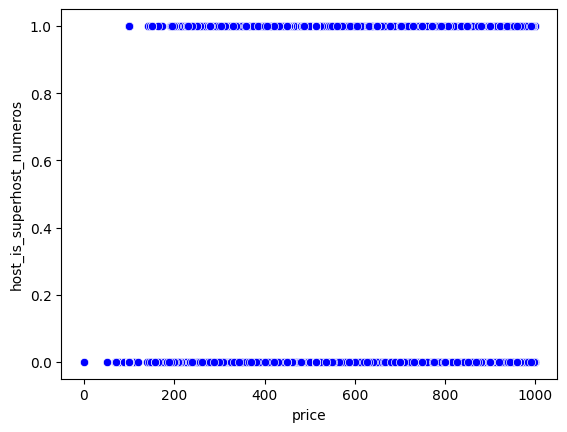

In [72]:
sns.scatterplot(x="price", y="host_is_superhost_numeros", color="blue", data=df)

accommodates vs bathrooms

<Axes: xlabel='accommodates', ylabel='bathrooms'>

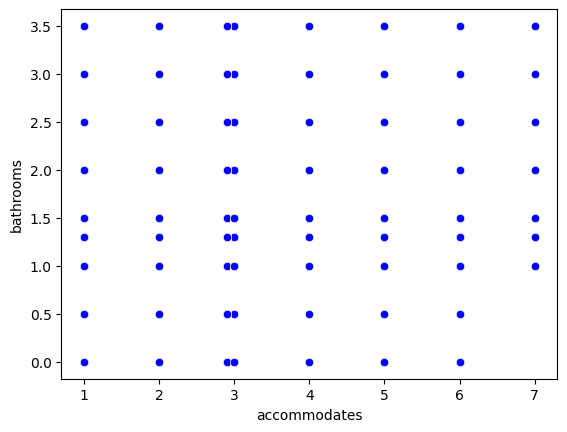

In [73]:
sns.scatterplot(x="accommodates", y="bathrooms", color="blue", data=df)

In [74]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['bathrooms']

In [75]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [76]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(Vars_Indep, Var_Dep)

LinearRegression()

In [78]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.15200309]),
 'rank_': 1,
 'singular_': array([234.55913891]),
 'intercept_': 0.8694462923286311}

In [79]:
#Predecimos los valores de total de accidentes a partir de la variable alcohol
#y_pred model.coef_
y_pred= model.predict(X=df[["accommodates"]])
y_pred

array([1.17345247, 1.31025525, 1.47745865, ..., 1.17345247, 1.17345247,
       1.17345247])

In [80]:
df.insert(0, "Predicciones_2", y_pred)
df

,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros
0,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0
1,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1
2,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1
3,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1
4,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1
26578,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26579,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26580,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0


<Axes: xlabel='accommodates', ylabel='bathrooms'>

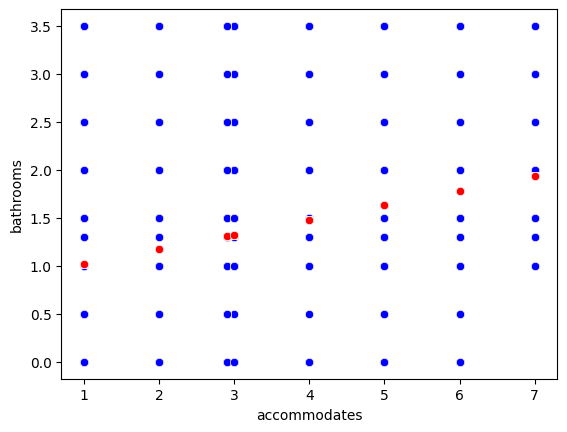

In [81]:
#Visualizamos la comparativa grafica entre el total real y el total predecido
sns.scatterplot(x="accommodates", y="bathrooms", color="blue", data=df)
sns.scatterplot(x="accommodates", y="Predicciones_2", color="red", data=df)

In [82]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15635537821282386

In [83]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Corre1=np.sqrt(coef_Deter)
coef_Corre1

0.3954179791218703

Price vs review_scores_cleanliness

<Axes: xlabel='price', ylabel='review_scores_cleanliness'>

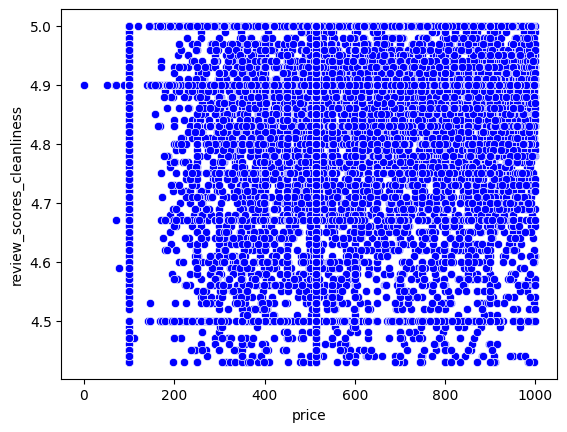

In [84]:
sns.scatterplot(x="price", y="review_scores_cleanliness", color="blue", data=df)

In [85]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep= df[['price']]
Var_Dep= df['review_scores_cleanliness']

In [86]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [87]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(Vars_Indep, Var_Dep)

LinearRegression()

In [88]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.32142059e-05]),
 'rank_': 1,
 'singular_': array([34866.12857706]),
 'intercept_': 4.8723422356785715}

In [89]:
#Predecimos los valores de total de accidentes a partir de la variable alcohol
#y_pred model.coef_
y_pred= model.predict(X=df[["price"]])
y_pred

array([4.85530171, 4.86902082, 4.85530171, ..., 4.85530171, 4.85530171,
       4.85530171])

In [90]:
df.insert(0, "Predicciones_3", y_pred)
df

,Predicciones_3,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros
0,4.855302,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0
1,4.869021,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1
2,4.855302,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1
3,4.855302,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1
4,4.855302,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.856134,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1
26578,4.855302,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26579,4.855302,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26580,4.855302,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0


<Axes: xlabel='price', ylabel='review_scores_cleanliness'>

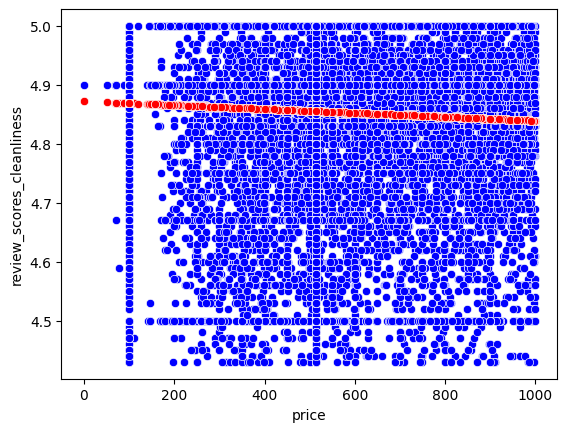

In [92]:
#Visualizamos la comparativa grafica entre el total real y el total predecido
sns.scatterplot(x="price", y="review_scores_cleanliness", color="blue", data=df)
sns.scatterplot(x="price", y="Predicciones_3", color="red", data=df)

In [93]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0028592360690593566

In [94]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Corre1=np.sqrt(coef_Deter)
coef_Corre1

0.053471825002138804

price vs host_identity_verified

In [97]:
#Convertimos la columna de host:is_superhost a numerica usando un mapeo
df["host_identity_verified_numerica"] = df["host_identity_verified"].replace({'f': 0, 't': 1})
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3266723597.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["host_identity_verified_numerica"] = df["host_identity_verified"].replace({'f': 0, 't': 1})


,Predicciones_3,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros,host_identity_verified_numerica
0,4.855302,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0,1
1,4.869021,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,...,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1,1
2,4.855302,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,...,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1,1
3,4.855302,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1,1
4,4.855302,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,...,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.856134,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,...,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1,1
26578,4.855302,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1
26579,4.855302,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1
26580,4.855302,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1


<Axes: xlabel='price', ylabel='host_identity_verified'>

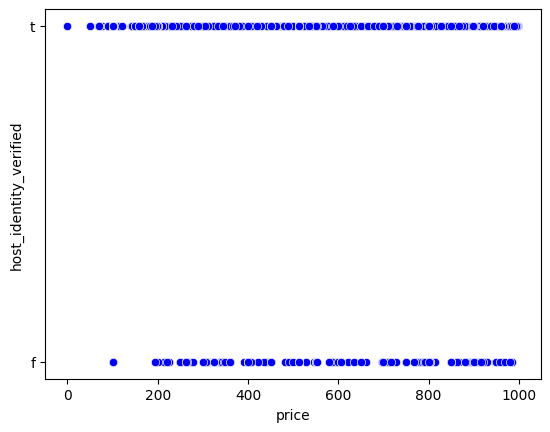

In [98]:
sns.scatterplot(x="price", y="host_identity_verified", color="blue", data=df)

price vs instant bookable

In [99]:
#Convertimos la columna de host:is_superhost a numerica usando un mapeo
df["instant_bookable_numerico"] = df["instant_bookable"].replace({'f': 0, 't': 1})
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\207980670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["instant_bookable_numerico"] = df["instant_bookable"].replace({'f': 0, 't': 1})


,Predicciones_3,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,...,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros,host_identity_verified_numerica,instant_bookable_numerico
0,4.855302,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,363,0.0,4.80,4.90,4.90,4.90,1.70,0,1,0
1,4.869021,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,...,325,64.0,4.58,4.70,4.78,4.98,0.41,1,1,0
2,4.855302,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,...,325,49.0,4.90,4.75,4.92,4.98,0.31,1,1,0
3,4.855302,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,257,127.0,4.91,4.96,4.98,4.96,0.83,1,1,0
4,4.855302,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,...,275,11.0,4.91,5.00,4.73,4.91,0.11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.856134,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,...,365,0.0,4.80,4.90,4.90,4.90,1.70,1,1,1
26578,4.855302,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1,1
26579,4.855302,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1,1
26580,4.855302,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1,1


<Axes: xlabel='price', ylabel='instant_bookable_numerico'>

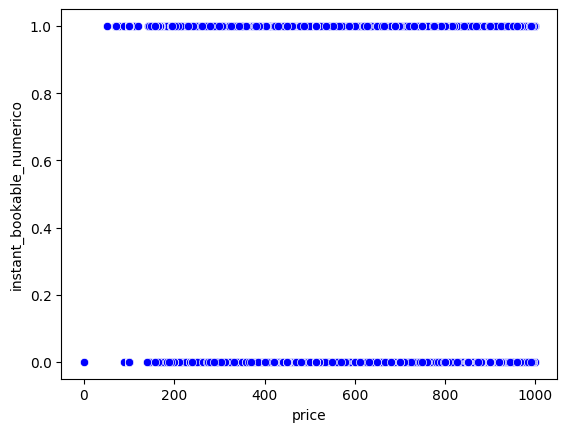

In [100]:
sns.scatterplot(x="price", y="instant_bookable_numerico", color="blue", data=df)

Price vs property_type

In [101]:
#Nuevo dataframe
df_3 = df[['property_type', 'price']].copy()
df_3

,property_type,price
0,Entire villa,513.049381
1,Entire home,100.000000
2,Entire rental unit,513.049381
3,Entire rental unit,513.049381
4,Entire loft,513.049381
...,...,...
26577,Private room in guesthouse,488.000000
26578,Room in hotel,513.049381
26579,Room in hotel,513.049381
26580,Room in hotel,513.049381


In [102]:
# Eliminar el símbolo "$" y convertir a número usando una función lambda
df_3['price'] = df_3['price'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
df_3

,property_type,price
0,Entire villa,513.049381
1,Entire home,100.000000
2,Entire rental unit,513.049381
3,Entire rental unit,513.049381
4,Entire loft,513.049381
...,...,...
26577,Private room in guesthouse,488.000000
26578,Room in hotel,513.049381
26579,Room in hotel,513.049381
26580,Room in hotel,513.049381


In [103]:
#Reemplazar valores nulos
df_3['price'].fillna(df_3['price'].mean(), inplace=True)
df_3

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3811224092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3['price'].fillna(df_3['price'].mean(), inplace=True)


,property_type,price
0,Entire villa,513.049381
1,Entire home,100.000000
2,Entire rental unit,513.049381
3,Entire rental unit,513.049381
4,Entire loft,513.049381
...,...,...
26577,Private room in guesthouse,488.000000
26578,Room in hotel,513.049381
26579,Room in hotel,513.049381
26580,Room in hotel,513.049381


In [104]:
#Convertir a numeros enteros
df_3['price'] = df_3['price'].astype(int)
df_3

,property_type,price
0,Entire villa,513
1,Entire home,100
2,Entire rental unit,513
3,Entire rental unit,513
4,Entire loft,513
...,...,...
26577,Private room in guesthouse,488
26578,Room in hotel,513
26579,Room in hotel,513
26580,Room in hotel,513


In [108]:
#Obtengo un ánalisis univariado de una variable en específico
table3 = freq_tbl(df_3['property_type'])
table3

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,9971,0.375103,0.375103
1,Entire condo,3423,0.128771,0.503875
2,Private room in rental unit,3034,0.114137,0.618012
3,Private room in home,2266,0.085246,0.703258
4,Entire loft,1515,0.056993,0.760251
...,...,...,...,...
87,Private room in floor,1,0.000038,0.999850
88,Earthen home,1,0.000038,0.999887
89,Entire in-law,1,0.000038,0.999925
90,Shared room in dorm,1,0.000038,0.999962


In [112]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table3_2 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table3_2

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515
...,...,...
87,Private room in floor,1
88,Earthen home,1
89,Entire in-law,1
90,Shared room in dorm,1


In [119]:
#Obtengo un filtro de los valores más reelevantes de las variables categórica seleccionada
Filtro3 = table3_2[table3_2['frequency']>1000]
Filtro3

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515


In [123]:
#Ajusto el índice de mi dataframe
Filtro_index3 = Filtro3.set_index('property_type')
Filtro_index3

,frequency
property_type,
Entire rental unit,9971
Entire condo,3423
Private room in rental unit,3034
Private room in home,2266
Entire loft,1515


In [125]:
table3_3 = Filtro_index3.drop(['frequency'], axis=1)
table3_3

""
property_type
Entire rental unit
Entire condo
Private room in rental unit
Private room in home
Entire loft


In [129]:
#Creamos un dataframe para cada valor de room type
Entire_rental_unit = df_3[df_3['property_type'] == 'Entire rental unit'].copy()
Entire_condo = df_3[df_3['property_type'] == 'Entire condo'].copy()
Private_room_in_rental_unit = df_3[df_3['property_type'] == 'Private room in rental unit'].copy()
Private_room_in_home = df_3[df_3['property_type'] == 'Private room in home'].copy()
Entire_loft= df_3[df_3['property_type'] == 'Entire loft'].copy()

In [131]:
Entire_condo

,property_type,price
33,Entire condo,991
44,Entire condo,513
64,Entire condo,513
70,Entire condo,513
102,Entire condo,513
...,...,...
26409,Entire condo,513
26434,Entire condo,513
26451,Entire condo,513
26486,Entire condo,513


In [132]:
Private_room_in_rental_unit

,property_type,price
7,Private room in rental unit,335
13,Private room in rental unit,526
16,Private room in rental unit,406
30,Private room in rental unit,406
35,Private room in rental unit,344
...,...,...
26554,Private room in rental unit,523
26564,Private room in rental unit,420
26568,Private room in rental unit,366
26569,Private room in rental unit,381


In [133]:
Private_room_in_home 

,property_type,price
10,Private room in home,384
15,Private room in home,750
23,Private room in home,100
29,Private room in home,500
56,Private room in home,348
...,...,...
26541,Private room in home,280
26545,Private room in home,231
26558,Private room in home,960
26567,Private room in home,480


In [134]:
Entire_loft

,property_type,price
4,Entire loft,513
17,Entire loft,513
19,Entire loft,100
42,Entire loft,800
45,Entire loft,513
...,...,...
26254,Entire loft,513
26395,Entire loft,513
26438,Entire loft,513
26518,Entire loft,513


In [130]:
Entire_rental_unit

,property_type,price
2,Entire rental unit,513
3,Entire rental unit,513
18,Entire rental unit,100
20,Entire rental unit,513
21,Entire rental unit,800
...,...,...
26571,Entire rental unit,513
26572,Entire rental unit,700
26574,Entire rental unit,513
26575,Entire rental unit,513
